## Visualize articles by publication
### General comparison

In [98]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

Load articles that have been matched to a breach in our dataset, with company data

In [99]:
identified_breach_articles = pd.read_csv(
    "../../data/article_company_breach/joined_articles_company_breaches_no_duplicates.csv",
    encoding="ISO-8859-1",
    low_memory=False,
)
# organisation, name, organisation_lower, and CompanyMentioned are equivalent.
# Other dropped columns are from breaches dataset and represent sources for that dataset.
# BreachMentioned contains only 'True', 'yes', and 'true'.
identified_breach_articles = identified_breach_articles.drop(columns=
        ['ID', 'organisation', 'alternative name', 'name', 'Unnamed: 0',
         'source name', '1st source link', '2nd source link', 'BreachMentioned', 'CompanyMentioned']
    )
identified_breach_articles = identified_breach_articles.rename(columns={'Unnamed: 0.1': 'id'})
print(identified_breach_articles.columns)
print(identified_breach_articles.shape)
#   ['id', 'records lost', 'year', 'breach_date', 'story', 'sector',
#    'method', 'interesting story', 'data sensitivity', 'displayed records',
#    'organisation_lower', 'domain', 'year founded', 'industry',
#    'size range', 'locality', 'country', 'linkedin url',
#    'current employee estimate', 'total employee estimate', 'article_date',
#    'Publication', 'Headline', 'URL']

Index(['id', 'records lost', 'year', 'breach_date', 'story', 'sector',
       'method', 'interesting story', 'data sensitivity', 'displayed records',
       'organisation_lower', 'domain', 'year founded', 'industry',
       'size range', 'locality', 'country', 'linkedin url',
       'current employee estimate', 'total employee estimate', 'article_date',
       'Publication', 'Headline', 'URL'],
      dtype='object')
(1147, 24)


Load articles that mention a breach, with company data

In [100]:
all_breach_company_articles = pd.read_csv(
    "../../data/article_data/joined_articles_companies_no_duplicates.csv",
    encoding="ISO-8859-1",
    low_memory=False,
)
all_breach_company_articles = all_breach_company_articles.drop(columns=['Unnamed: 0', 'BreachMentioned'])
print(all_breach_company_articles.columns)
print(all_breach_company_articles.shape)
#   ['name', 'domain', 'year founded', 'industry', 'size range', 'locality',
#    'country', 'linkedin url', 'current employee estimate',
#    'total employee estimate', 'Date', 'Publication', 'Headline', 'URL',
#    'CompanyMentioned']

Index(['name', 'domain', 'year founded', 'industry', 'size range', 'locality',
       'country', 'linkedin url', 'current employee estimate',
       'total employee estimate', 'Date', 'Publication', 'Headline', 'URL',
       'CompanyMentioned'],
      dtype='object')
(12735, 15)


Load all articles that mention a breach

In [101]:
all_breach_articles = pd.read_csv(
    "../../data/article_data/articles_about_breaches.csv",
    encoding="ISO-8859-1",
    low_memory=False,
)
print(all_breach_articles.columns)
print(all_breach_articles.shape)
# ['Date', 'Publication', 'Headline', 'URL', 'BreachMentioned', 'CompanyMentioned']

Index(['Date', 'Publication', 'Headline', 'URL', 'BreachMentioned',
       'CompanyMentioned'],
      dtype='object')
(44629, 6)


Load all articles

In [102]:
all_articles = pd.read_csv(
    "../../data/article_data/articles_all.csv",
    encoding="ISO-8859-1",
    low_memory=False,
)
print(all_articles.columns)
print(all_articles.shape)
# ['Date', 'Publication', 'Headline', 'URL', 'BreachMentioned', 'CompanyMentioned']

Index(['Date', 'Publication', 'Headline', 'URL', 'BreachMentioned',
       'CompanyMentioned'],
      dtype='object')
(2824201, 6)


Group by publication

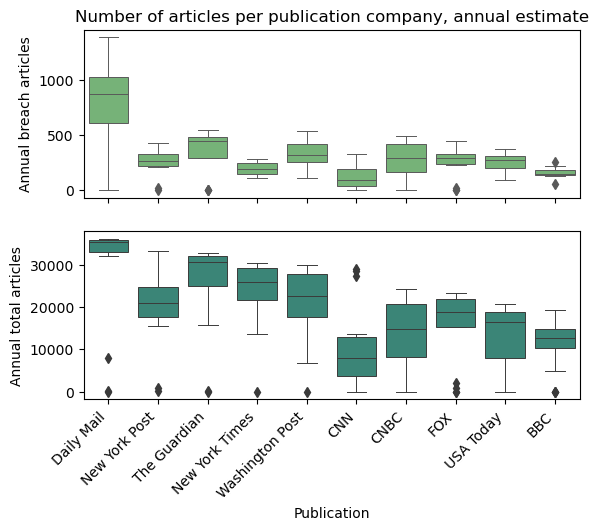

In [103]:
# Count articles per publication company, per year
all_breaches_by_pub = all_breach_articles
all_breaches_by_pub['Year'] = (all_breaches_by_pub['Date'] / 10000).round()
all_breaches_by_pub = all_breaches_by_pub.groupby(['Year', 'Publication']).agg({
  'URL': 'count'
}).rename(columns={'URL': 'article_count'}).reset_index()

all_by_pub = all_articles
all_by_pub['Year'] = (all_by_pub['Date'] / 10000).round()
all_by_pub = all_by_pub.groupby(['Year', 'Publication']).agg({
  'URL': 'count'
}).rename(columns={'URL': 'article_count'}).reset_index()

# Plot top is breach articles, bottom is total articles
order = all_by_pub.groupby(['Publication'])['article_count'].max().sort_values(ascending=False).index
fig, (ax1, ax2) = plt.subplots(2, sharex=True)
ax1.set_title('Number of articles per publication company, annual estimate')
sns.boxplot(ax=ax1, x=all_breaches_by_pub['Publication'], order=order,
            y=all_breaches_by_pub['article_count'], color='#6CBC6E', linewidth=0.7)
sns.boxplot(ax=ax2, x=all_by_pub['Publication'], order=order, y=all_by_pub['article_count'],
            color='#2F917E', linewidth=0.7)
ax1.set(xlabel="", ylabel="Annual breach articles")
ax2.set(xlabel="Publication", ylabel="Annual total articles")
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.show()

Caption: Box plots showing the difference in reporting trends between publishing companies. The bottom graph shows the total articles from each publisher annually, and the top graph shows the articles that mention a data breach from each publisher annually. Daily Mail publishes articles about breaches the most compared to other publishers, while the other publishers have a similar number of breach related articles to each other. The difference between publishers are muted compared to overall article counts.

       Publication article_count
0              BBC         1.16%
1             CNBC         2.03%
2              CNN         1.22%
3       Daily Mail         2.75%
4              FOX         1.55%
5    New York Post          1.3%
6   New York Times         0.78%
7     The Guardian         1.51%
8        USA Today         1.58%
9  Washington Post         1.46%


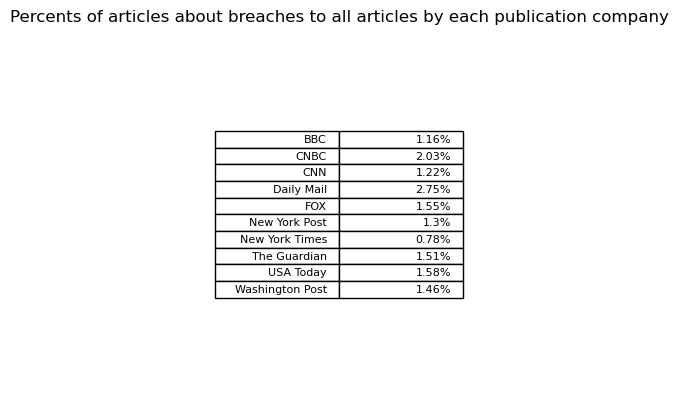

In [104]:
# Calculate proportion of breach-related articles to all articles, per publication company
# Over all years
all_breaches = all_breaches_by_pub.groupby(['Publication']).agg({
  'article_count': 'sum'
}).reset_index()

all = all_by_pub.groupby(['Publication']).agg({
  'article_count': 'sum'
}).reset_index()

article_props = all_breaches['article_count'] / all['article_count']

tb = pd.DataFrame([all['Publication'], ((article_props * 10000).round() / 100)
                   .astype('string') + '%']).transpose()
print(tb)
plt.table(cellText=tb.values, loc='center', colWidths=(0.25, 0.25),)
plt.title('Percents of articles about breaches to all articles by each publication company')
plt.axis('off')
plt.show()

Caption: Table of publisher to percentage of breach related articles out of all articles from that publisher. Articles about breaches take up the highest proportion of all articles published by Daily Mail compared to other publishers. New York Times have the lowest proportion of breach related articles.

### Compare breach related article counts between publishers
Count breach articles per publication company, per year

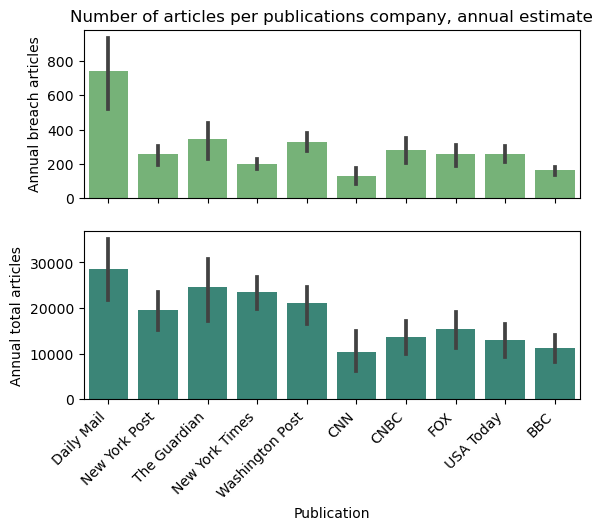

In [105]:
joined_breach_art_comp = identified_breach_articles

# Count breach articles per publication company, per year
joined_all = joined_breach_art_comp.groupby(['year', 'Publication']).agg({
  'URL': 'count'
}).rename(columns={'URL': 'article_count'}).reset_index()

fig, (ax1, ax2) = plt.subplots(2, sharex=True)
ax1.set_title('Number of articles per publications company, annual estimate')
sns.barplot(ax=ax1, x=all_breaches_by_pub['Publication'], order=order,
            y=all_breaches_by_pub['article_count'], color='#6CBC6E', linewidth=0.7)
sns.barplot(ax=ax2, x=all_by_pub['Publication'], order=order, y=all_by_pub['article_count'],
            color='#2F917E', linewidth=0.7)
ax1.set(xlabel="", ylabel="Annual breach articles")
ax2.set(xlabel="Publication", ylabel="Annual total articles")
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.show()

Caption: Bar charts showing the difference in reporting trends between publishing companies. The bottom graph shows the total articles from each publisher annually, and the top graph shows the articles that mention a data breach from each publisher annually. This figure highlights that the difference between the number of articles from publishers is more muted when comparing breach-related news against overall news.